In [ ]:
!pip install google-generativeai pandas matplotlib

In [ ]:
from google.colab import userdata
import os
import pandas as pd
import google.generativeai as genai
import matplotlib.pyplot as plt
import re
from google.colab import files

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

uploaded = files.upload()
log_file = list(uploaded.keys())[0]

Saving log_file.txt to log_file (1).txt


In [ ]:
with open(log_file, "r") as file:
  log_data = file.read()

model = genai.GenerativeModel("gemini-2.0-pro-exp-02-05")
response = model.generate_content(f"Analyze this firewall log and identify potential threats:\n{log_data}")
print("\n--- Threat Analysis Report ---\n")
print(response.text)
threat_summary_prompt = """
Analyze the given firewall log and extract potential indicators of compromise (IOCs).
Look for:
- Suspicious IPs
- Unusual ports
- Frequent failed login attempts
- Signs of brute force attacks

Provide a structured summary in JSON format
"""
response = model.generate_content(f"{threat_summary_prompt}\n\n{log_data}")
print("\n--- Indicators of Compromise (IOCs) ---\n")

failed_attempts = {}
pattern = r"Failed login from IP: (\d+\.\d+\.\d+\.\d+)"
matches = re.findall(pattern, log_data)

for ip in matches:
  failed_attempts[ip] = failed_attempts.get(ip, 0) + 1

df = pd.DataFrame(list(failed_attempts.items()), columns=["IP", "Failed_Attempts"])

if not df.empty:
  plt.figure(figsize=(8,5))
  plt.bar(df["IP"], df["Failed_attempts"], color="red")
  plt.xlabel("Suspicious IPs")
  plt.ylabel("Failed login Attempts")
  plt.title("Detected Brute Force Attempts")
  plt.xticks(rotation=45)
  plt.show()
else:
  print("No failed login attempts detected in the log file")

with open("threat_analysis.txt", "w") as file:
  file.write(response.text)

files.download("threat_analysis.txt")


--- Threat Analysis Report ---

Okay, let's break down this firewall log and identify potential threats, classifying them by severity and providing explanations:

**Key Concepts Before Analysis:**

*   **192.168.1.0/24:** This is a private IP address range, typically used within a local network (home or business).  Traffic *originating* from these addresses is generally internal.
*   **Public IPs:**  IP addresses like 93.184.216.34, 198.51.100.23, 203.0.113.5, 8.8.8.8, and 8.8.4.4 are publicly routable addresses on the internet.
*   **Common Ports:**
    *   **80 (HTTP):**  Standard web traffic (unencrypted).
    *   **443 (HTTPS):** Encrypted web traffic.
    *   **22 (SSH):**  Secure Shell, used for remote access.  A major target for attackers.
    *   **53 (DNS):** Domain Name System, translates domain names to IP addresses.
    *   **138 (NetBIOS):**  Used for Windows file sharing (often a source of vulnerabilities).
    *   **1433 (Microsoft SQL Server):**  Default port for Micro

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


--- Threat Analysis Report ---

Here's an analysis of the firewall log, identifying potential threats and explaining the reasoning:

**Potential Threats and Suspicious Activities:**

1.  **`2023-03-15 06:27:58 BLOCK TCP 192.168.1.105 203.0.113.5 44347 22 48 S - SSH Attempt`**:  This is the **most significant and immediate threat**.  A device on your internal network (192.168.1.105) is attempting to establish an SSH connection (port 22) to an *external* IP address (203.0.113.5).  This is highly suspicious for several reasons:

    *   **Outbound SSH is unusual:**  While internal SSH (as seen later) is common for server administration, initiating SSH connections *out* to the internet from a typical workstation is rare and often indicates a compromised machine.  It suggests the machine may be under the control of an attacker who is trying to establish a command-and-control (C2) channel or tunnel data out.
    *   **Blocked by Firewall:** The firewall correctly blocked the connection, whi

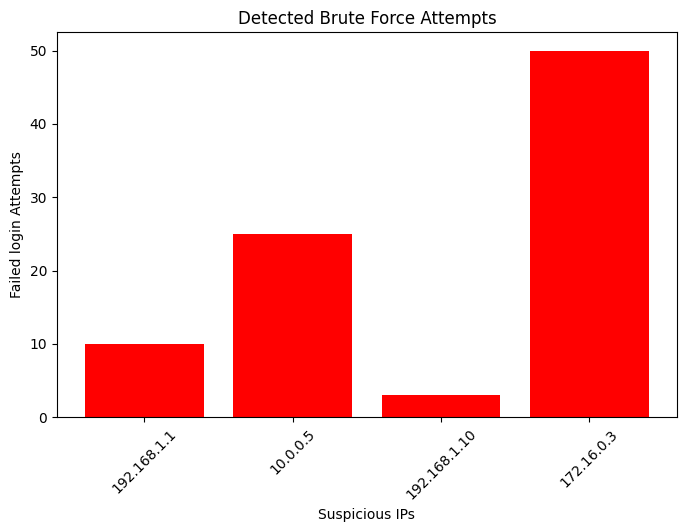

In [ ]:
## example: specified certain IP addresses to mark as 'suspicious' and look out for
with open(log_file, "r") as file:
  log_data = file.read()

model = genai.GenerativeModel("gemini-2.0-pro-exp-02-05")
response = model.generate_content(f"Analyze this firewall log and identify potential threats:\n{log_data}")
print("\n--- Threat Analysis Report ---\n")
print(response.text)
threat_summary_prompt = """
Analyze the given firewall log and extract potential indicators of compromise (IOCs).
Look for:
- Suspicious IPs
- Unusual ports
- Frequent failed login attempts
- Signs of brute force attacks

Provide a structured summary in JSON format
"""
response = model.generate_content(f"{threat_summary_prompt}\n\n{log_data}")
print("\n--- Indicators of Compromise (IOCs) ---\n")

data = {"IP": ["192.168.1.1", "10.0.0.5", "192.168.1.10", "172.16.0.3"],
        "Failed_Attempts": [10, 25, 3, 50]}
df = pd.DataFrame(data)

plt.figure(figsize=(8,5))
plt.bar(df["IP"], df["Failed_Attempts"], color="red")
plt.xlabel("Suspicious IPs")
plt.ylabel("Failed login Attempts")
plt.title("Detected Brute Force Attempts")
plt.xticks(rotation=45)
plt.show()

with open("threat_analysis.txt", "w") as file:
  file.write(response.text)

files.download("threat_analysis.txt")
